https://github.com/czhuang/JSB-Chorales-dataset/tree/master

view token distributions in LAKH and new data

In [95]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

load lakh data

In [96]:
with open('/ix/djishnu/Aaron/2_misc/PGM_Project/content_tokenizing/lakh_tokenized/tokenized_midi5000.pickle', 'rb') as f:
    lakh_data = pickle.load(f)

load new data

In [97]:
with open('/ix/djishnu/Aaron/2_misc/PGM_Project/content_tokenizing/clean_midi/tokenized_midi5000.pickle', 'rb') as f:
    new_data = pickle.load(f)

## name overlaps

look at overlap betweek lakh copyrights and new data

In [98]:
new_data_artist_names = os.listdir('/ix/djishnu/Aaron/2_misc/PGM_Project/content/clean_midi')

lakh copyrights

In [99]:
# Function to find and return the matched name in the line
def find_matched_name(line, name_list):
    for name in name_list:
        if name in line:
            return name
    return None

# Alternatively, you can store the matched names in a list
matched_names = []
with open('/ix/djishnu/Aaron/2_misc/PGM_Project/content/lakh_data/lakh_artists.txt', 'r') as file:
    for line in file:
        matched_name = find_matched_name(line, new_data_artist_names)
        if matched_name:
            matched_names.append(matched_name)

# Now you have a list of matched names
print(set(matched_names))


{'Deftones', 'James Taylor', 'Asia', 'America', 'Hanson', 'Alexandra', 'Alan Parsons', 'LEN', 'Burt Bacharach', 'Daniel', 'Amber', 'William Orbit', 'Chip Davis', 'Rod Stewart', 'Erasure', 'The Cure', 'mid', 'Chic', 'Cake', 'Todd Rundgren', 'Sailor Moon', 'Garbage', 'Phil Collins', 'The Beatles', 'Rammstein', 'Barry White', 'Wagner', 'Gino Paoli', 'Pantera', 'Opus', 'Battisti', 'Carpenters', 'Keith', 'Carl Perkins', 'Tal Bachman', 'Pooh', 'Neil Diamond', 'David Bowie', 'Fastball', 'Yanni', 'Toto', 'Burton Lane', 'Van Halen', 'Yes', 'Lit', 'Elliot', 'Jeff', 'Vega', 'Cher', 'Twila Paris', 'Shania Twain', 'James', 'Antoine', 'Elton John', 'Free', 'Santo', 'Ray Charles', 'Warren', '883', 'U2', 'Focus', 'Paul Simon', 'John Denver', 'Tori Amos', 'Roy Orbison', 'Fabi', 'Band', 'Camel', 'Trio', 'Them', 'Chris de Burgh', 'Donovan', 'Spirit', 'Duke', 'Devo', 'M', 'Carpenter', 'Megadeth', 'Sailor', 'Bonnie Tyler', 'Adriano Celentano', 'Sonia', 'Bob Dylan', 'Kraftwerk', 'Lulu', 'Interactive', 'Zero

In [100]:
matches_length2 = set([x for x in matched_names if len(x.split()) > 1])

In [101]:
len(matches_length2)

46

In [102]:
len(new_data_artist_names)

2200

## token distributions

In [125]:
import itertools
import pandas as pd

In [126]:
lakh_data_token_flat = np.array(list(itertools.chain.from_iterable(lakh_data)))
len(lakh_data_token_flat)

104306250

In [127]:
new_data_token_flat = np.array(list(itertools.chain.from_iterable(new_data)))
len(new_data_token_flat)

149311255

In [128]:
lakh_unique_elements, counts = np.unique(lakh_data_token_flat, return_counts=True)
lakh_data_frequency_table = dict(zip(lakh_unique_elements, counts/len(lakh_data_token_flat)))

In [147]:
new_data_freq_df = pd.DataFrame.from_dict(new_data_frequency_table, orient='index')

In [138]:
lakh_data_freq_df = pd.DataFrame.from_dict(lakh_data_frequency_table, orient='index')

In [148]:
lakh_data_freq_df['x'] = lakh_data_freq_df.index.to_list()
new_data_freq_df['x'] = new_data_freq_df.index.to_list()

lakh_data_freq_df['data source'] = 'LAKH'
new_data_freq_df['data source'] = 'Contemporary'


freq_df = pd.concat([lakh_data_freq_df, new_data_freq_df], axis = 0)

repair freq in case we are missing any token #s

In [140]:
# f_idx = [x for x in list(set(freq_df['x'])) if x in np.linspace(0, 1564)]
all_toks_list = [x for x in range(1564)]

In [149]:
missing_toks_lakh = np.setdiff1d(all_toks_list, lakh_data_freq_df['x'])
missing_toks_new = np.setdiff1d(all_toks_list, new_data_freq_df['x'])

In [150]:
lakh_df_add = pd.DataFrame({'x': missing_toks_lakh, 'data source': ['LAKH' for x in missing_toks_lakh], 
                           0: [0.0 for x in missing_toks_lakh], 'count': [0 for x in missing_toks_lakh]})


new_df_add = pd.DataFrame({'x': missing_toks_new, 'data source': ['Contemporary' for x in missing_toks_new], 
                           0: [0.0 for x in missing_toks_new], 'count': [0 for x in missing_toks_new]})


missing_tok_df = pd.concat([lakh_df_add, new_df_add], axis = 0)

In [151]:
lakh_df_final = pd.concat([lakh_data_freq_df, lakh_df_add], axis = 0)
new_df_final = pd.concat([new_data_freq_df, new_df_add], axis = 0)

In [122]:
from matplotlib.ticker import MaxNLocator


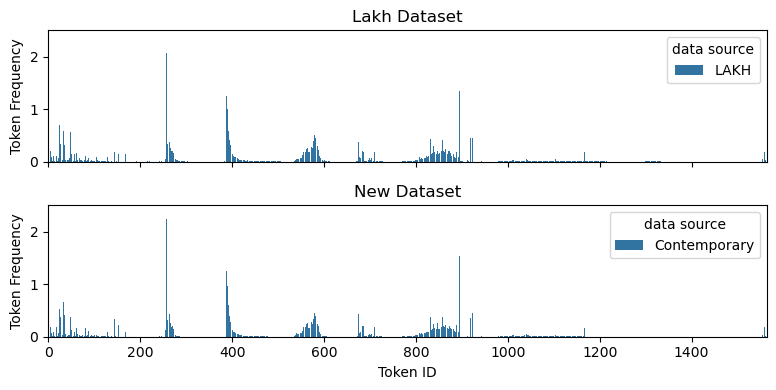

In [152]:

fig,axs = plt.subplots(2,1, figsize = (8, 4), sharex=True)

sns.barplot(lakh_df_final, x = 'x', y= lakh_df_final[0]*100,  hue = 'data source', ax = axs[0])
axs[0].set_title('Lakh Dataset')
axs[0].set_ylim(0, 2.5)
axs[0].set_ylabel('Token Frequency')
axs[0].set_xlabel('Token ID')
axs[0].xaxis.set_major_locator(MaxNLocator(nbins=10))
sns.barplot(new_df_final, x = 'x', y=new_df_final[0]*100,hue = 'data source', ax = axs[1])
axs[1].set_title('New Dataset')
axs[1].set_ylim(0,2.5)
axs[1].set_ylabel('Token Frequency')
axs[1].xaxis.set_major_locator(MaxNLocator(nbins=10))
axs[1].set_xlabel('Token ID')

plt.tight_layout()
plt.show()